In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,f1_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn import set_config

# Modelisation
## Importation des données

In [2]:
data = pd.read_csv('df1.csv')
data.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,367823,0,54000.0,334152.0,18256.5,270000.0,0.004960,-18496,-523,-3640.0,...,0,0,0,0,0,0,0,0,0,0
1,364348,0,211500.0,378117.0,30001.5,342000.0,0.002042,-20084,365243,-11313.0,...,0,0,0,0,1,0,0,1,0,0
2,405788,1,135000.0,152820.0,16177.5,135000.0,0.018029,-17747,-1824,-3264.0,...,0,0,0,0,0,1,0,1,0,0
3,389677,0,202500.0,707287.5,38497.5,562500.0,0.007274,-9937,-452,-2112.0,...,0,0,0,0,0,1,0,1,0,0
4,233092,0,135000.0,1292013.0,42700.5,1057500.0,0.035792,-21914,365243,-5265.0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
data = data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X = data.drop('TARGET', axis = 1)
y = data['TARGET'] 

## 1- DummyRegressor

In [4]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate
set_config(display="diagram")  
# Le fractionnement des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DummyRegressor()
param_grid = {'strategy' : ['mean', 'median']}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# les étapes du pipeline :
pipe = Pipeline([("sm", SMOTE()), ("std", StandardScaler()),  ("dum", DummyRegressor())], verbose = True)
pipe.fit(X_train, y_train)
CV_gr = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
result = CV_gr.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 3) Processing sm, total=   0.4s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.1s
[Pipeline] ............... (step 3 of 3) Processing dum, total=   0.0s


In [5]:
result.best_score_

-2.8579127280936588e-06

In [6]:
bestParam = result.best_params_
bestParam

{'strategy': 'mean'}

## 2- Regression Logistique

In [8]:
from sklearn.linear_model import LogisticRegression

X = data.drop('TARGET', axis = 1)
y = data['TARGET']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = LogisticRegression(dual=False)
param_grid = { "penalty":["l2"], "C":[ 0.01, 0.1, 1, 10 ], "max_iter":[20000] }

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# les étapes du pipeline 
pipe = Pipeline([("sm", SMOTE()), ('std', StandardScaler()),  ("rgl", LogisticRegression())], verbose = False)
pipe.fit(X_train, y_train)

Pipeline(steps=[('sm', SMOTE()), ('std', StandardScaler()),
                ('rgl', LogisticRegression())])

In [9]:
CV_gr = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, refit=True, return_train_score=False)
result = CV_gr.fit(X_train, y_train)

In [10]:
result.best_score_

0.9159053927568579

In [11]:
bestParam = result.best_params_
bestParam 

{'C': 0.01, 'max_iter': 20000, 'penalty': 'l2'}

## 3- KNeighborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,35),
             'weights': ['uniform', 'distance']} 

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# les étapes du pipeline :
pipe = Pipeline([("sm", SMOTE()), ('std', StandardScaler()),  ("knb", KNeighborsClassifier())], verbose = True)
pipe.fit(X_train, y_train)


[Pipeline] ................ (step 1 of 3) Processing sm, total=   0.2s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.1s
[Pipeline] ............... (step 3 of 3) Processing knb, total=   0.0s


Pipeline(steps=[('sm', SMOTE()), ('std', StandardScaler()),
                ('knb', KNeighborsClassifier())],
         verbose=True)

In [13]:
CV_gr = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, refit=True, return_train_score=False)

In [14]:
result = CV_gr.fit(X_train, y_train)

In [15]:
result.best_score_

0.9157505939952479

In [16]:
bestParam = result.best_params_
bestParam

{'n_neighbors': 8, 'weights': 'uniform'}

 ## 4- Forêt aléatoire

In [17]:
from sklearn.ensemble import RandomForestClassifier
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

# Le fractionnement des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators' :[200, 500], 
                   'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8],
                    'criterion' :['gini', 'entropy'] }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
# les étapes du pipeline :
pipe = Pipeline([("sm", SMOTE()), ("std", StandardScaler()),  ("clas", RandomForestClassifier())], verbose = True)
pipe.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 3) Processing sm, total=   0.3s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.1s
[Pipeline] .............. (step 3 of 3) Processing clas, total=   4.8s


Pipeline(steps=[('sm', SMOTE()), ('std', StandardScaler()),
                ('clas', RandomForestClassifier())],
         verbose=True)

In [18]:
CV_gr = GridSearchCV(model, param_grid, n_jobs=-1, refit=True, cv=kfold, verbose=1)
result = CV_gr.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [19]:
result.best_score_

0.9149760307726987

In [20]:
bestParam = result.best_params_
bestParam

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

## 5- Support  Vecteurs Machines (SVM)

In [21]:
from sklearn.svm import SVC
data = pd.read_csv('dat_svm.csv')
data = data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X = data.drop('TARGET', axis = 1)
y = data['TARGET'] 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


model = SVC()
param_grid = {'C': [0.1],  
              'gamma': [0.01 ], 
              'kernel': ['linear','rbf']}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# les étapes du pipeline :
pipe = Pipeline([("sm", SMOTE()), ("std", StandardScaler()),  ("svm", SVC())], verbose = True)
pipe.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 3) Processing sm, total=   0.1s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svm, total=   0.0s


Pipeline(steps=[('sm', SMOTE()), ('std', StandardScaler()), ('svm', SVC())],
         verbose=True)

In [31]:
CV_gr = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
result = CV_gr.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [32]:
result.best_score_

0.9325301204819277

In [33]:
bestParam = result.best_params_
bestParam

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

## 6- XGBoots Classifier

In [22]:
from sklearn.metrics import fbeta_score, make_scorer
from xgboost import XGBClassifier
import xgboost
data = pd.read_csv('df1.csv')
data = data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

model = XGBClassifier()
param_grid = {'nthread':[2],
              'objective':['binary:logistic'],
              'n_estimators': [ 800],
              'learning_rate': [0.01, 0.02],
              'gamma': [2 ],             
              'max_depth': [ 4] }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# les étapes du pipeline :
pipe = Pipeline([("sm", SMOTE()), ("std", StandardScaler()),  ("xgb", XGBClassifier())], verbose = True)
pipe.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 3) Processing sm, total=   0.3s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.1s
[Pipeline] ............... (step 3 of 3) Processing xgb, total=  13.2s


Pipeline(steps=[('sm', SMOTE()), ('std', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))],
         verbose=True)

In [23]:
CV_gr = GridSearchCV(model, param_grid, n_jobs=-1, refit=True, cv=kfold,  verbose=1)
result = CV_gr.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [24]:
result.best_score_

0.918473704228472

In [25]:
bestParam = result.best_params_
bestParam 

{'gamma': 2,
 'learning_rate': 0.02,
 'max_depth': 4,
 'n_estimators': 800,
 'nthread': 2,
 'objective': 'binary:logistic'}

In [28]:
def modelis(data=[], verbose=False):
    #Liste des modèles à entrainer
    models=[LogisticRegression(C = 0.01, max_iter = 20000, penalty = 'l2', dual=False),
            KNeighborsClassifier(n_neighbors = 8, weights ='uniform'),
            SVC(C= 0.1, gamma = 0.01, kernel ='rbf', probability=True),
            RandomForestClassifier(criterion = 'gini', max_depth=4, n_estimators=200, random_state=42, oob_score=True),
            XGBClassifier(gamma= 2,learning_rate = 0.01, max_depth = 4, n_estimators = 800, nthread = 2,
                          objective= 'binary:logistic')]
    f1 = []
    auc = []
    recall = []
    precision = []
    #Entrainement des modèles pour obtenir leurs mesures de performances
    for model in models:
        clf = model
        clf.fit(X_train, y_train)
        test_preds = clf.predict(X_test)
        f1.append(f1_score(y_test, test_preds))
        auc.append(roc_auc_score(y_test, test_preds))
        recall.append(recall_score(y_test, test_preds))
        precision.append(precision_score(y_test, test_preds))
        #Impression de modèle et du rapport
        if verbose:
            print('Classification Model: ',model,'\n')
            print(classification_report(y_test, test_preds),'\n')
            y_pred_proba = clf.predict_proba(X_test)[::, 1]
            tauc = metrics.roc_auc_score (y_test, y_pred_proba).round(2)
            print('Le Score AUC est: ',tauc,'\n')
    #Enregistrer les resultats dans un dataframe
    results = pd.DataFrame([f1,auc, precision,recall],
                      index= ['f1','roc_auc','precision','recall',],
                           columns=['LogisticRegression','KNeighborsClassifier','SVC','RandomForestClassifier','XGBClassifier'])
    return results.transpose()

## Comparaison  des scores des differents modèles : Precison, recall, f1-score et l'AUC 

In [30]:
compar = modelis(data=[X_test,y_test], verbose=True)

Classification Model:  LogisticRegression(C=0.01, max_iter=20000) 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2107
           1       0.00      0.00      0.00       200

    accuracy                           0.91      2307
   macro avg       0.46      0.50      0.48      2307
weighted avg       0.83      0.91      0.87      2307
 

Le Score AUC est:  0.62 

Classification Model:  KNeighborsClassifier(n_neighbors=8) 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2107
           1       0.00      0.00      0.00       200

    accuracy                           0.91      2307
   macro avg       0.46      0.50      0.48      2307
weighted avg       0.83      0.91      0.87      2307
 

Le Score AUC est:  0.49 

Classification Model:  SVC(C=0.1, gamma=0.01, probability=True) 

              precision    recall  f1-score   support

           0       0.91      1.00      0

## Le meilleur modèle par metric

In [50]:
print('Les Meilleurs modèles en fonction du metrique sont : ','\n')
for metric in compar.columns:
    print(f'{metric.capitalize()}:',compar.sort_values(metric,ascending=False).index[0])

Les Meilleurs modèles en fonction du metrique sont :  

F1: XGBClassifier
Roc_auc: XGBClassifier
Precision: XGBClassifier
Recall: XGBClassifier


In [38]:
b_mdl=XGBClassifier(gamma= 2,learning_rate = 0.01, max_depth = 4, n_estimators = 800, nthread = 2,objective= 'binary:logistic')
b_mdl.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, nthread=2, num_parallel_tree=None,
              predictor=None, ...)

In [41]:
y_pred = b_mdl.predict(X_test)
b_mdl.score(X_test, y_test)

0.9115734720416124

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2100,    7],
       [ 197,    3]], dtype=int64)

## Calcul de fbeta_score

In [43]:
from sklearn.metrics import fbeta_score, make_scorer
mon_score = fbeta_score(y_test, y_pred, beta=2)
mon_score

0.01851851851851852

## Evaluation des métriques par validation croisée avec les temps d'entrainement et les scores avec cross_validate

In [44]:
m_score =dict(beta=make_scorer(fbeta_score, beta=2))

In [45]:
from sklearn.model_selection import cross_validate
model_cros = XGBClassifier(gamma = 2, learning_rate=0.02, max_depth= 4, n_estimators=800, objective='binary:logistic', nthread=2)
eva_mdl = cross_validate(model_cros, X_train, y_train, cv=5, scoring=m_score, return_train_score=True,return_estimator=True)

In [46]:
print(eva_mdl['fit_time'])

[31.43503141 27.01211596 28.40523005 27.06533527 26.90205741]


In [47]:
print(eva_mdl['score_time'])

[0.05173302 0.03315902 0.03010869 0.06527352 0.03381014]


In [24]:
import shap
explainer = shap.Explainer(model, X)
shap_values = explainer(X_test)

 99%|===================| 2281/2307 [01:11<00:00]        

### Les features les plus importants en moyenne 

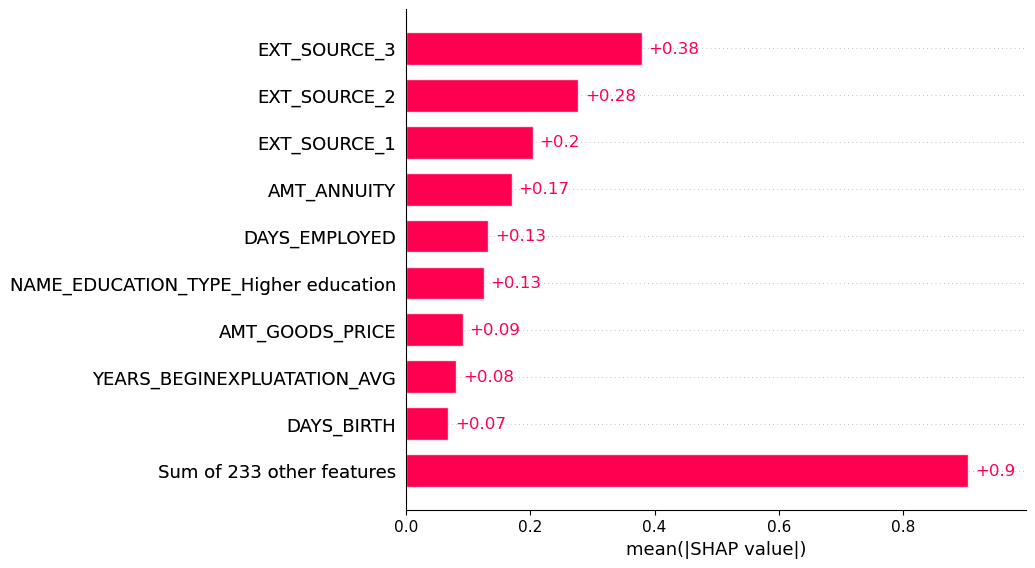

In [25]:
shap.plots.bar(shap_values)

## La courbe ROC Curve

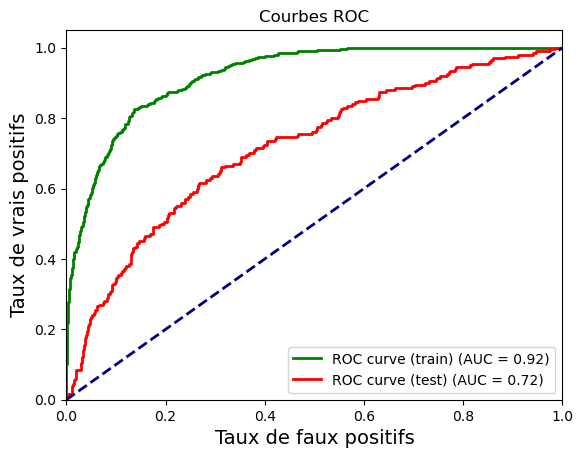

In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
y_train_pred = b_mdl.predict_proba(X_train)[:, 1]
y_pred_proba = b_mdl.predict_proba(X_test)[:, 1]

[fpr_in, tpr_in, thr] = metrics.roc_curve(y_train, y_train_pred)
roc_auc_tr = auc(fpr_in, tpr_in)
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
roc_auc_test = auc(fpr, tpr)

plt.plot(fpr_in, tpr_in, color='green', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_tr)
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs', fontsize=14)
plt.ylabel('Taux de vrais positifs', fontsize=14)
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()